# Text analysis of 16th and 17th century Ottoman Legal Courts' Catalogues

This project is about a particular type of contract in Konstaniyye(Constantinople) and the wider Istanbul(the surroundings of Constantinople between 1513 and 1691. The strong bureaucracy of the Ottoman Empire during this period produced a vast corpus of Islamic court documents still extant up to this day. They have been digitalized and are available on the website http://kadisicilleri.org/(technical information about these below).

These catalogues are relevant because they are court documents in which people often report about temessuk and their content. Often, of course, to solve issues with the help of an Islamic judge(Kadi). The catalogues are thus full of entries containing information about the peculiar contracts named temessuk. I thus intend to extract the catalogues' entries that contain the word temessuk.

The temessuk was a privately issued contract between 2 or more parties on which various issues regarding an incomplete transaction, a debt, was recorded. (Aykan, 2016) Monetary history of the Ottoman Empire usually claims that tangible money was scarce in the Ottoman Empire with a particular crisis in the late 16th century, a time period covered by our documents.(Pamuk, 2003)

In the following literary analysis, I hope to uncover four things: first (1) I ask whether the temessuk's occurrences in the court documents changed over time; then (2) I question what whether the debt recorded by the contract was in money or in other forms of goods; (3) I interrogate the documents to know whether women took part in the use of the temessuk or not; and finally I cross-reference points two and three in order to understand on what basis women could be excluded from the concerns of and discussions about these contracts. In order to propose answers to these questions, I am at producing various quantitative approaches to the documents. I want to use the word frequency of terms and a sentiment analysis inspired approach to evaluate both gender and the kinds of money used in temessuks.

However, this paper project is not only about history per se, it is also about digital humanities. In itself, it is a step away from Stephan Marche's accusation of computational humanities as a reduction of human culture(2012). But beyond being a counter-argument to anti-technology academics, what is digital humanities?  Digital humanities, as Andrew Piper as suggested, is about the "merger of two entire fields.(Piper, 2018)." This researcher also specifies that Stéfan Sinclair has suggested that Digital Humanities imply contributions in various forms such as the building of programs of recipes.  Recipes are a simple "Rather than starting with the technologies of analytics and their jargon" to help new learners visualize and ask simple questions "a humanist may want to do" (Stéfan Sinclair & Geoffrey Rockwell, 2012). I think of this project as a program-recipe for future Ottoman historians who want to learn programming using the same corpus of sources I do. Also, this work has benefited from the collaboration of pairs either from forums or from Professor Stéfan Sinclair and other colleagues. In that sense, also, this paper corresponds to Mendell's definition of digital scholarship: I am not only a "content provider", nor have I worked through this program by myself (Mandell, 2012). Finally, the very form of this text highlights how it belongs to the field of digital humanities: it is accessible for free to anyone with a connection to the Internet. Lack other forms of digital scholarship, thus, my project has the possibility of having much more impact, than a conventional scholarship (Piper, 2018).

But First, let's import the documents, clean them, and push them on github for the wider community of Ottoman historians to use!

I wasn't able to automatize the download of the documents from the web over 40 catalogues from the website http://kadisicilleri.org/. So I downloaded them by hand. They were in PDF format, so I used Voyant's 'Document' function(http://voyant-tools.org/) to convert them into '.txt' files. I then manually placed them in a file, and also manually renamed the files according to their date. This will allow us to do chronological analysis below.

Now, I propose to use regular expressions and os to analyse the organize and clean the documents that I placed in a particular file for this project by matching particular patterns found in them, and then erasing them.

In [5]:
import os        #import os, a virtual operating system         
import re
import regex     #import regex, allows look arounds functions others not support by python3.x (it is 'pip-install'ed)
path = "/home/otzy/local_directory/Final Project/corpora/"       #determines path
os.chdir(path)           #changes the directory to determined path
filenames = os.listdir(path)        #creates variable filenames based on the lists of the docuements.
print(filenames)                    #prints filenames

['1613-1615 galata 37.txt', '1577-1578 galata 7.txt', '1573-1591 galata 15.txt', '1663-1663 galata 90.txt', '1675-1676 istanbul 18.txt', '1618-1618 istanbul 3.txt', '1524-1530 uskudar 5.txt', '1594-1595 rumeli 21.txt', '1670-1671 eyup 82.txt', '1612-1643 haskoy 5.txt', '1641-1644 galata 65.txt', '1647-1649 rumeli 80.txt', '1582-1583 uskudar 56.txt', '1633-1633 rumeli 56.txt', '1590-1591 uskudar 84.txt', '1637-1638 eyup 37.txt', '1579-1580 uskudar 51.txt', '1655-1655 eyup 61.txt', '1546-1549 uskudar 2.txt', '1585-1587 eyup 3.txt', '1606-1607 galata 32.txt', '1691-1691 bab 54.txt', '1726-1738 istanbul 24.txt', '1679-1680 eyup 90.txt', '1615-1620 galata 46.txt', '1644-1644 eyup 49.txt', '1546-1549 uskudar 14.txt', '1563-1563 balat 2.txt', '1619-1620 eyup 19.txt', '1663-1664 istanbul 12.txt', '1685-1686 bab 46.txt', '1549-1556 uskudar 17 .txt', '1575-1576 Galata 5.txt', '1666-1667 bab 3.txt', '1534-1536 uskudar 9 .txt', '1674-1679 haskoy 10.txt', '1661-1662 eyup 74.txt', '1562-1563 uskudar

In [6]:
for filename in filenames:              #loop through all individual files printed above
    with open(path+filename, 'r') as f: #read and write in file
        string = f.read()               #transform the document into a workable string
        start = string.find("KONU BAŞLIKLARI\n") #finds index of Konu baskilari followed by blank space
        string = string[start:]                  #determines new start in the document based on preceding step
        with open(path+filename, 'w') as f:      #open the file as 'writable'
            f.write(string)                      #write the string
print(string[:2000])                             #print first 2000 index of last document in loops
                                                 #to confirm effectivity of string.

KONU BAŞLIKLARI

1 [1b-1] Mîrî esirlerden Batista’nın serbest bırakıldığı / 51
2 [1b-2] Nardo adlı esirin serbest bırakıldığı / 51
3 [1b-3] Borç ikrarı / 51
4 [1b-4] Abdi Bölükbaşı’nın vasiyeti uyarınca Cafer Bey’e on iki bin akçe 

teslim edildiği / 51
5 [1b-5] Ölen oğlunun mirasından annesine hissesinin verildiği / 51
6 [1b-6] Küçüğün ana para ve kârından doğan alacağının üçüncü 

kişice ödendiği / 51
7 [1b-7] Bölükbaşı’nın vasiyeti / 52
8 [2a-1] Yakub Kethüdâ Vakfı’nın, ölen Memi Bey’de alacağı olduğu / 52
9 [2a-2] Emine Hatun’un parasının bezzâzistan kethüdâsına emaneten verildiği / 52
10 [2a-3] Ali Reis’in karısının parasının kethüdâya emaneten verildiği / 52
11 [2a-4] Muhyiddin Efendi mahallesinde ölen Râbia’nın terekesinin satıldığı / 52
12 [2a-5] Mudârebe olarak verilen paranın tamamen geri alındığına dair / 53
13 [2a-6] Mudârebe olarak verilen paranın geri alındığı / 53
14 [2b-1] İki kardeşin tereke davasında sulh oldukları / 53
15 [2b-2, Arapça] Rahime adlı çocuğa vasî, vasîy

These documents are already useful in their form: they start exactly where the primary sources start. Yet much noise remains in all catalogues. In the above text, before the beginning of the source (identified by the first numbers in a pair of brackets), we see the title of the section, page headings(repeated on every page), page numbers and footnotes. Although we do not the latter, these are characterized by a star at the beginning of the line ('*'). 
For instance: "\n* Metinde “olmamağla”.\n"

To ensure that such noise doesn't interfere with the making the individual documents, the documents must be cleaned further. Thanks to regex and the re.sub() function, it isn't that hard. The challenge is rather in making efficient and short regular expressions that guarantees the cleaning efficacy and saving in CPU.

I decided to replace the substrings below with '\n\n' to ensure that there is no misregrouping of paragraphs. I would not want catalogue entries to be mixed with one another.

In [7]:
for filename in filenames:              #start looping through filenames
    with open(path+filename, 'r') as f: #open doc as readable
        string = f.read()               #string becomes doc text content
        string = re.sub(r"KONU BAŞLIKLARI", "\n\n", string) #replaces section title with \n\n
        string = re.sub(r"\n.*sicil[.]indd.*\n", "\n\n", string) #replaces source creation time with \n\n
        string = re.sub(r"\n([A-Z]\s|İ\s|Ü\s).*\n\n[0-9]+", "\n\n", string) #replaces page heading and page number with \n\n
        string = re.sub(r"(\n)*[*].*(\n)*", "", string) #removes footnotes
        string = re.sub(r"(\n)+(?=[a-z])", "\n", string) #replaces a series of empty lines followed by a letter by \n
    with open(path+filename, 'w') as f:               #open as writable
        f.write(string)                               #replace document content with string

After exploring manually some chunks of the document, I conclude that the results are satisfying, but two problems remain. 
First, there are a few '0' or '004' written at the beginning of a empty lines with no other character on the same line. These must be left overs from some of the source creation time.
Second, there are many spaces within the text. So I have to regroup the entries that belong together. For this I use once more the re re.sub() function.

In [8]:
for filename in filenames:
    with open(path+filename, 'r+') as f: # r+ to read & write in file
        string = f.read()
        string = re.sub("^[0-9]+\n", "", string)                    #replaces page numbers
        string = re.sub("(\n)+(?=[A-Za-z]|Ş|İ|i|Ü|ü|Ö|ö|ğ|Ğ|-)", "\n", string) #same as earlier includes the turkish-specific characteres
    with open(path+filename, 'w') as f:
        f.write(string)

After exploring manually chunks of the larger documents, I observe that the some re.sub() has trouble reading certain lines that begin with "Şuhûdü’l-hâl" and "Fi’l-yevmi’", so I'll have to readjust the document once more wiht with a re.sub() specific to both these terms. It's important to do so because both terms appear in nearly all entries as they respectivally mean "witness" and "in the date of".

In [9]:
for filename in filenames:           #loop through filenmaes
    with open(path+filename, 'r+') as f: # r+ to read & write in file
        string = f.read()                  
        string = re.sub("\n+(?=Şuhûdü’l-hâl.*)", "\n", string) #unifies witnesses of entry with entry
        string = re.sub("\n+(?=Fi’l-yevmi’.*)", "\n", string) # unifies date of entry with entry
    with open(path+filename, 'w') as f:          #open as writable
        f.write(string)                          #write new string

There are still some faults, and I think this is because of the Turkish script. But the mistakes are marginal as most paragraphs are delineated properly. Good job!

Let's make these clean documents available to the wider public of Ottoman Historians and programmers. I decided to do this manually. I simply dragged and drop the file named Corpora into my github and committed all the documents. The documents can be found at: https://github.com/Istighma/LLCU612/tree/master/Corpora.

I can now move on to answer, at least partially, my first question regarding temessuk: did the occurrence of the temessuk contract changed overtime? If so, how? The best way to answer this is to use build a graph that shows chronologically the number of occurrences of the word temessuk. Thanks to some previous non-automated work, the files are named by date and are thus organized chronologically.

Enough talking, let's get graphical!

In [10]:
import nltk #Natural language processing
import matplotlib.pyplot as plt #allows plotting of data in graphs

In [11]:
dict_frequency = {} #create dictionary
for filename in filenames:  #for loop to pass all files through the following command
    with open(path+filename, 'r') as f: #open file name in path and read
        string = f.read() #create string by reading doc
        count = string.count("temessük") #create _int_ data to create a value to join to dictionary key
    if filename not in dict_frequency: #adds filename to the dictionary
        dict_frequency[filename] = 0 #writes  value 0 to key
    dict_frequency[filename] = dict_frequency[filename] + count  #adds _int_'count' to value 
print(dict_frequency)  #print dictionary

{'1613-1615 galata 37.txt': 3, '1577-1578 galata 7.txt': 1, '1573-1591 galata 15.txt': 33, '1663-1663 galata 90.txt': 17, '1675-1676 istanbul 18.txt': 32, '1618-1618 istanbul 3.txt': 30, '1524-1530 uskudar 5.txt': 2, '1594-1595 rumeli 21.txt': 4, '1670-1671 eyup 82.txt': 5, '1612-1643 haskoy 5.txt': 9, '1641-1644 galata 65.txt': 5, '1647-1649 rumeli 80.txt': 0, '1582-1583 uskudar 56.txt': 0, '1633-1633 rumeli 56.txt': 10, '1590-1591 uskudar 84.txt': 24, '1637-1638 eyup 37.txt': 19, '1579-1580 uskudar 51.txt': 8, '1655-1655 eyup 61.txt': 9, '1546-1549 uskudar 2.txt': 8, '1585-1587 eyup 3.txt': 14, '1606-1607 galata 32.txt': 6, '1691-1691 bab 54.txt': 43, '1726-1738 istanbul 24.txt': 4, '1679-1680 eyup 90.txt': 30, '1615-1620 galata 46.txt': 2, '1644-1644 eyup 49.txt': 16, '1546-1549 uskudar 14.txt': 0, '1563-1563 balat 2.txt': 1, '1619-1620 eyup 19.txt': 28, '1663-1664 istanbul 12.txt': 43, '1685-1686 bab 46.txt': 77, '1549-1556 uskudar 17 .txt': 2, '1575-1576 Galata 5.txt': 2, '1666-16

In order to transform this data set in a chronological graph, the best thing to do is to sort out the dictionary entry by ascending order.

Text(0, 0.5, 'Occurences of temessük')

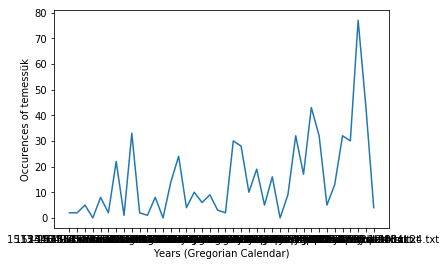

In [12]:
graphicable = list(sorted(nltk.FreqDist(dict_frequency).items())) # sorted by ascending order(not frequency)
year = [f[0] for f in graphicable]            # x becomes key's name
LengthValues = [f[1] for f in graphicable]    # y becomes key's value
plt.plot(year, LengthValues)                  # situates fct(x, y)
plt.xlabel('Years (Gregorian Calendar)')      # X Label names
plt.ylabel('Occurences of temessük')          # y label names

Unfortunately, I haven't been able to change the angle of the independent variable. And I lack the time to explore ObservableHQ to solve this issue in another program. However, in the meantime, we can see that there is an evolution over the 150 years that concern this project. Why is there an overtime augmentation? I do not know, and to provide an answer, one needs to move beyond these primary sources and look at secondary material discussing Ottoman economic history.

### Extracting paragraphs containing the word temessük

I can now move on to extract the paragraphs containing the concept concerning my project, temessuk, or contract. For this, thanks to Professor Stéfan Sinclair, I was able to produce a "paragraph extractor." It takes all paragraphs containing the word temessuk and turns them into its own individual document. Let's remember that because of the cleaning done earlier, one paragraph is equivalent to one full-court entry.

In [13]:
paragraphs = [] # track paragraphs
for filename in filenames:
    with open(path+filename, 'r') as f:
        string = f.read()
    pos = 0 # initial position marker (assuming our keyword isn't at the very start)
    while(pos>-1): # loop while we have a match
        pos = string.find("temessük", pos+1) # find next match
        leftNewLine = string.rfind("\n\n", 0, pos) # find previous newline
        rightNewLine = string.find("\n\n", pos) # find next newline
        paragraph = string[leftNewLine+2:rightNewLine] # isolate paragraph
        if paragraph: # if we have a non-empty string
            paragraphs.append(paragraph) # add it to the paragraphs
os.mkdir(path+'temessuke ilgili kaynaklar')   #creates new directory
os.chdir(path+'temessuke ilgili kaynaklar')   #changes directory
for i, paragraph in enumerate(paragraphs):    #loop through orders number and names in enumerate(paragraphs)
    filename = '{0:03d}'.format(i)+'.txt'     #filename starts with three digit, ends with .txt
    with open(filename, 'w') as f:            #open filename as writable
        f.write(paragraph)                    #writes paragraph

Now, all matters are set. We have our paragraphs, and we can now procede with a sentiment analysis.

# Contracts: money or goods?
As discussed earlier, the second problematic concerns whether the debt recorded by contract was in money or in valuable goods. From experience with these primary sources and as acknowledged by Pamuk, I can affirm that money is indicated by two particular words: akçe and guruş(Pamuk, 2003). Contracts containing these terms necessarily imply money, since both terms serve as a unit of account to describe sums of tangible money. Thus, if these words are present in a paragraph containing the word temessuk, one can assume that the contract in question is being discussed at least partially in terms of money, whether in the contract or as a means to solve a conflict within the contract.

The sentiment analysis approach is a good way to assess whether money or valuable goods were used in discussing the temessuk contracts. Let us not be misguided by the name of this approach, however, for sentiment analysis aims only at expressing a method that evaluates the value of a text according to a binary standard. The best opportunity I see with the analysis of temessuk through a sentiment analysis is an analysis of whether exchange in contracts was made by discussing tangible money or through goods (quantity of boats, heritage, property).

For this, I have thought of a binary list implying words related to fixed monetary units (see in the dictionary below). I have also decided to attribute no negative value to this 'sentiment analysis', for my goal is to show whether a contract did or did not use money(akçe and guruş).

A clear limitation in this approach is that it will not provide any information about what was used to discuss value in contracts when money wasn't discussed.

To answer this second problematic, we have to create a dictionary with the appropriate values.

In [14]:
kind_money = {         #opens dictionary
    "tangible money": {            #opens first sub-dictionary called 'tangible money'
        'akçe': 1,                 #first sign of tangible money
        'kuruş': 1                 #first sign of tangible money 
    }
} #close dictionary kind_money{}

Once the dictionary is done, we can associate a value to the each documents and then quantify how many documents discussed money.

In [15]:
from nltk.corpus import PlaintextCorpusReader         #PlaintextCorpusReader, makes corpus management easier
path = "/home/otzy/local_directory/Final Project/corpora/temessuke ilgili kaynaklar/"  #determines path
temessCorpus = PlaintextCorpusReader(path, '.*txt')          #defines corpus

documents = {} # keep track of values for each document
for fileid in temessCorpus.fileids():
    text = temessCorpus.raw(fileid).lower() # read each text and convert to lower case
    tokens = nltk.word_tokenize(text) # tokenize
    score = 0 # keep track of the score fo this document
    for polarity, words_dict in kind_money.items(): # look at our sentiments dictionary
        for word, value in words_dict.items(): # go through each word in the list
            score += tokens.count(word) * value # occurences multiplied by value (often zero) added to score value
    documents[fileid] = score # assign the score
print(documents)

{'000.txt': 0, '001.txt': 0, '002.txt': 0, '003.txt': 0, '004.txt': 4, '005.txt': 0, '006.txt': 0, '007.txt': 0, '008.txt': 0, '009.txt': 0, '010.txt': 5, '011.txt': 5, '012.txt': 2, '013.txt': 0, '014.txt': 0, '015.txt': 0, '016.txt': 0, '017.txt': 0, '018.txt': 0, '019.txt': 3, '020.txt': 0, '021.txt': 2, '022.txt': 0, '023.txt': 0, '024.txt': 0, '025.txt': 0, '026.txt': 0, '027.txt': 2, '028.txt': 3, '029.txt': 0, '030.txt': 6, '031.txt': 1, '032.txt': 1, '033.txt': 0, '034.txt': 0, '035.txt': 2, '036.txt': 0, '037.txt': 1, '038.txt': 0, '039.txt': 0, '040.txt': 0, '041.txt': 0, '042.txt': 17, '043.txt': 3, '044.txt': 3, '045.txt': 1, '046.txt': 0, '047.txt': 0, '048.txt': 1, '049.txt': 1, '050.txt': 1, '051.txt': 1, '052.txt': 1, '053.txt': 1, '054.txt': 1, '055.txt': 1, '056.txt': 1, '057.txt': 0, '058.txt': 8, '059.txt': 0, '060.txt': 0, '061.txt': 0, '062.txt': 1, '063.txt': 0, '064.txt': 0, '065.txt': 0, '066.txt': 0, '067.txt': 0, '068.txt': 0, '069.txt': 0, '070.txt': 0, '071

We know that these documents are classified by ascending order because they were produced by reading the chronologically organized catalogues. So we could produce a graphic containing this data, but it would not be indicative of much without any other data with which it can be cross-referenced. In other words, because there is no negative value to the document, our statistics now only show whether a document used money or only goods to refer indicate what kind of value was discussed in the entry containing a conversation about the temessuk contract.

To produce this other set of data to cross-reference this one with, I attempt to produce a gender analysis. The two sets of data will then be compared with one another in the hope of uncovering some meaning around the use of contracts in 16th-17th century Istanbul.

### Did Economic Affairs Concern Only Men? Quantitative Answers with a Gender analysis
Let's explore how this interacted with gender now. 

Works on Ottoman monetary history hardly ever discuss women. With the exception of Sureya Faroqhi (Faroqhi, 1995) I am aware of no authors who discuss the interactions of money and women in the Empire. I thus ponder the simple question of the presence of women in the discussions of economic contracts. 

To provide some bits of the answer to this interrogation, I build a much more exhaustive dictionary that indicates the presence of women in the legal entries about contracts. In order to see how I build this dictionary, please refer to my Secondary notebook 1.

Once more, I decided not to attribute a negative sub-dictionary because it would have fostered more confusion about whether or not women were present in the entries. My goal is not to compare their presence to man's, but rather to assess the presence of women in discussions of contract.

In [16]:
dict_womenid = {                          #make a dictionary   
    "women": {                            #copy pasted all the data from the Secondary notebook 1
        'Hatun': 1, 'hatun': 1, 'Hâtun': 1, 'hâtun': 1, 'Fâtıma': 1, 'Emine': 1, 'Belkıs': 1,
         'Hâkimin': 1, 'Zeyni': 1, 'Gülnar': 1, 'Zamâne': 1,
         'Rahime': 1, 'Beyşâh': 1, 'Hasnâ': 1, 'Nisâ': 1,
         'Zehrâ': 1, 'Râbia': 1, 'Cennet': 1, 'Meryem': 1,
         'Dâye': 1, 'Fedâi': 1, 'Mümine': 1, 'Huri': 1,
         'Cevza': 1, 'Zeyneb': 1, 'Safiye': 1, 'Kamer': 1,
         'Nefîse': 1, 'Muhsine': 1, 'Balkıza': 1, 'Mehmed': 1,
         'Saliha': 1, 'Mihriban': 1, 'Havvâ': 1, 'Aynî': 1,
         'Eyne': 1, 'Kerime': 1, 'Pedermâh': 1, 'Nene': 1,
         'Hatice': 1, 'Tûtî': 1, 'Selime': 1, 'Havva': 1,
         'Semenzâr': 1, 'Herdem': 1, 'Mama': 1, 'Sâime': 1,
         'Saraylı': 1, 'Kâmile': 1, 'Fahri': 1, 'Nakışcı': 1,
         'Mâhıruhsar': 1, 'Ayşe': 1, 'Selâmet': 1, 'Hamide': 1,
         'Latif': 1, 'Usta': 1, 'Raziye': 1, 'Canfedâ': 1, 'Rukiye': 1,
         'Hâcce': 1, 'Afrasyab': 1, 'Emetullah': 1, 'Hayrünnisa': 1,
         'Yümnî': 1, 'Hümâ': 1, 'Sâkine': 1, 'Aişe': 1, 'Zeliha': 1,
         'Mahbûbe': 1, 'Sâbiha': 1, 'Sitti': 1, 'Kalender': 1,
         'Zahide': 1, 'Nefise': 1, 'Neslihan': 1, 'Asiye': 1,
         'Gülâbiye': 1, 'Gülâbî': 1, 'Hûbân': 1, 'Zeynî': 1, 'Fatma': 1,
         'Fahrî': 1, 'Râziye': 1, 'Karakaş': 1,
         'Mihrî': 1, 'Münteha': 1, 'Münevver': 1, 'Cihân': 1, 'Ferahşad': 1,
         'Abdullah': 1, 'Dilâver': 1, 'Eşi': 1, 'Sâliha': 1, 'Müdâm': 1,
         'Câriye': 1, 'Mülâyim': 1, 'Fağfur': 1, 'Mihri': 1, 'Gülahmer': 1,
         'Cemile': 1, 'Hacer': 1, 'Zühre': 1, 'Mehpâre': 1, 'Nâzenin': 1,
         'Zâhide': 1, 'Mehlika': 1, 'Bedriye': 1, 'Pervane': 1, 'Aliye': 1,
         'Hâce': 1, 'Hacı': 1, 'Gülşâh': 1, 'Fedâyî': 1, 'Mâhi': 1, 'Sabiha': 1,
         'Habibe': 1, 'Râzıye': 1, 'Servi': 1, 'Dilaver': 1, 'Halime': 1,
         'Cenâne': 1, 'Bağcinâne': 1, 'Nâfile': 1, 'Müstakim': 1, 'Han': 1, 'Hân': 1,
         'Vildan': 1, 'Bâşe': 1, 'Turfanda': 1, 'Nâime': 1, 'Utul': 1,
         'Yasemin': 1, 'Hafsa': 1, 'Dilber': 1, 'Lâleruh': 1, 'Rabia': 1,
         'Hanım': 1, 'Kahraman': 1, 'Kırımlı': 1, 'Firuz': 1, 'Fîruz': 1, 'Eşmiye': 1,
         'Peri': 1, 'Sakine': 1, 'Sâyime': 1, 'Müslime': 1, 'Pakize': 1, 'Müstakīme': 1,
         'Gonca': 1, 'Muazzer': 1, 'Muazzez': 1, 'Merhûme': 1, 'Züleyha': 1, 'Afîfe': 1,
         'Selim': 1, 'Saime': 1, 'Mücellâ': 1, 'Kıye': 1, 'Fütûha': 1, 'Hace': 1,
         'Sahra': 1, 'Sâbire': 1, 'Hamile': 1, 'Kethüdâ': 1, 'Bedrimâh': 1, 'Hâmide': 1,
         'Muammere': 1, 'Gülizar': 1, 'Rıdvan': 1, 'Servinaz': 1, 'Nesli': 1, 'Sultâne': 1,
         'Mihrihan': 1, 'Bula': 1, 'Hânî': 1, 'Habib': 1, 'Mülayime': 1, 'Fati': 1,
         'Hemrâz': 1, 'Hayrünnisâ': 1, 'Nesimeşah': 1, 'Hatîce': 1, 'Cariye': 1, 'Yümn': 1,
         'Afife': 1, 'Vasafhan': 1, 'Hayri': 1, 'Hamîde': 1, 'Naime': 1, 'Bigümân': 1,
         'Hoşelhan': 1, 'Hoşelhân': 1, 'Perizâd': 1, 'Kâmuran': 1, 'Katko': 1, 'Mâhruhsar': 1,
         'Beyhan': 1, 'Gülbûy': 1, 'Bedirhan': 1, 'Lâlezâr': 1, 'Perizat': 1, 'Kâtibe': 1, 
         'Gülşah': 1, 'Ruveyde': 1, 'Peymâne': 1, 'Sabûhi': 1, 'Sabûhî': 1, 'Hala': 1,
         'Lâlegûn': 1, 'Nazver': 1, 'Nazike': 1, 'Mâhımünir': 1, 'Siyavuş': 1, 'Hâni': 1,
         'Nefsâ': 1, 'Marola': 1, 'Kirana': 1, 'Latife': 1, 'Mevlâhü': 1, 'Marziye': 1,
         'Fersa': 1, 'Gülkıyâfet': 1, 'Mâhî': 1, 'Müferrah': 1, 'Menzile': 1,
         'Vasî': 1, 'Hayrunnisâ': 1, 'Cani': 1, 'Hundi': 1, 'Hani': 1, 'Hanî': 1,
         'Gülbahar': 1, 'Hesna': 1, 'Hesnâ': 1, 'Cinân': 1, 'Vasfıhan': 1, 'Rûşen': 1,
         'Canfeda': 1, 'Cinâne': 1, 'Esmâ': 1, 'Döne': 1, 'Bülbül': 1, 'Mihmân': 1,
         'Cenan': 1, 'Huban': 1, 'Payidar': 1, 'Zeynep': 1, 'Suhbî': 1, 'Gülruh': 1,
         'Merdüm': 1, 'Nergis': 1, 'Hurşid': 1, 'Temenna': 1, 'Hâkime': 1, 'Nârin': 1, 'Tireli': 1
        }
}

Let's attribute a gender value to our temessuk documents now!

In [17]:
gender_value = {} # keep track of values for each document 
for fileid in temessCorpus.fileids():     #loops through all documents of corpus
    text = temessCorpus.raw(fileid) # read each text
    tokens = nltk.word_tokenize(text) # tokenize individual words
    score = 0 # keep track of the score fo this document
    for i, thing in dict_womenid.items(): # look at our sentiments dictionary
        for word, value in thing.items(): # go through each word in the list
            score += tokens.count(word) * value #score + tokens multiplied by value of key in dictioanary
    gender_value[fileid] = score # assign the score

In [18]:
#python sum() function & not seen in class
#thanks to : https://docs.python.org/3/library/functions.html
#adds 1 everytime value in gender_value is equivalent to 1 or more
print("Numer of documents containing mentions of women:")
sum(1 for value in gender_value.values() if value >= 1)

Numer of documents containing mentions of women:


534

That's an impressive number of occurrences of tokens related to women when discussing contracts! Perhaps women had more of a place in the economy than we thought. Let's try to in which cases women do not appear in the discussion. This leads us to the final part of this paper.

# Making Sense of the Data: Cross-Referencing Data and Meaning

We have seen that 534 out of 643 documents have mentions of women. What about the remaining 109 documents? Let's attempt to find which discussions implying temessuk excluded women! Did goods-based or money-based contracts have correspond more with the absence of women in the discussions of contracts?

It is essential for researchers to always cross-reference data in order to provide better meaning. In order to do so, I propose to create a new dictionary of the documents in which women were not mentioned, and then attribute a value of +1 or -1 based on the first 'sentiment' analysis that we did. In other words, +1 will represent the use of money in these documents, -1 the use of goods in contracts.

In [19]:
dict_notwomen = {}       #creates dictionary
                                            
for key, value in gender_value.items():   # for position 1 and position 2 in dict.items(the key and its value)
    if value == 0:                     #if value is superior or equivalent to 1 (so if it discusses money)
        dict_notwomen[key] = 0
        
print(len(dict_notwomen))          #prints length of dict
print("---")                       #prints ---
print(len(documents))              #prints number of total documents

for key, value in documents.items():        
    if key in dict_notwomen and value >= 1:    #1 = if discusses money
        dict_notwomen[key] += 1
    if key in dict_notwomen and value == 0:
        dict_notwomen[key] += -1               #-1 = if does not discuss money
print(dict_notwomen)

sum(1 for value in dict_notwomen.values())

109
---
643
{'000.txt': -1, '024.txt': -1, '025.txt': -1, '090.txt': -1, '092.txt': -1, '106.txt': 1, '114.txt': -1, '115.txt': -1, '117.txt': 1, '118.txt': 1, '119.txt': 1, '121.txt': -1, '124.txt': -1, '131.txt': -1, '132.txt': 1, '133.txt': 1, '134.txt': 1, '136.txt': -1, '137.txt': -1, '139.txt': -1, '143.txt': -1, '145.txt': -1, '146.txt': 1, '147.txt': 1, '152.txt': 1, '169.txt': 1, '178.txt': 1, '188.txt': -1, '189.txt': 1, '200.txt': 1, '204.txt': 1, '205.txt': 1, '206.txt': 1, '207.txt': 1, '208.txt': 1, '217.txt': 1, '226.txt': 1, '227.txt': 1, '228.txt': 1, '236.txt': 1, '237.txt': -1, '253.txt': -1, '254.txt': -1, '256.txt': -1, '307.txt': -1, '308.txt': -1, '309.txt': -1, '310.txt': -1, '319.txt': 1, '328.txt': 1, '329.txt': 1, '330.txt': -1, '331.txt': -1, '332.txt': 1, '333.txt': 1, '334.txt': 1, '335.txt': 1, '336.txt': -1, '337.txt': -1, '338.txt': -1, '339.txt': -1, '340.txt': -1, '353.txt': 1, '354.txt': -1, '360.txt': -1, '386.txt': 1, '387.txt': 1, '388.txt': 1, '4

109

We now have one set of data to work with, but I think it would be appropriate to split the data in two values in order to simply know which kinds of value implied that women were not discussed in conversations about contracts.

In [20]:
score_money = 0                                     #defines value to variable score_money
score_notmoney = 0                                  #defines value to variable score_notmoney
for key, value in dict_notwomen.items():            #loop key & value through dict_notwomen
    if value == 1:                                  #If value is equivalent to one, add 1 to score_money
        score_money += +1                           
    else:                                           #else
        score_notmoney += +1                        #add +1 to score_notmoney
print("Estimated content of contracts when women are not part of the discussion.")
print(score_money)
print(score_notmoney)

Estimated content of contracts when women are not part of the discussion.
44
65


A pie chart will make this data more intelligible.

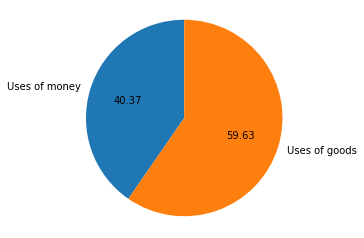

In [21]:
pielabels = 'Uses of money', 'Uses of goods'
pieshare = [44, 65]

B, axesObject = plt.subplots() #subplots() needs to variable, but I do not understand why exactly
                                  # I think it's because subplots() is made with both keys and labels

axesObject.pie(pieshare,        #.pie(values, labels=?, autopct=?, startangle=?)
        labels=pielabels,
        autopct='%1.2f',        #how many digits
        startangle=90)
axesObject.axis('equal')        #I'm not sure I understand this part
plt.show()                   #This shows the results of the graph

This is an interesting graph, but we loose the possibility to evaluate change overtime! However, visualize well how the use of goods has 20% more chance not to involve women. But let's visualize the data with another graph.

Let's make a scatter graph in order to put forth the chronological order of our documents.

Text(0, 0.5, 'Money or Goods?')

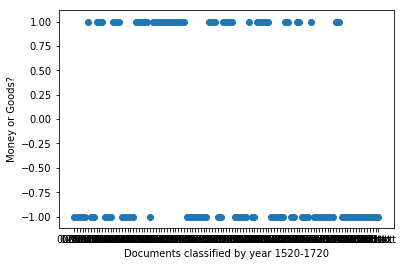

In [22]:
graphicable = list(sorted(nltk.FreqDist(dict_notwomen).items())) # sorted by ascending order(not frequency)
year = [f[0] for f in graphicable]                   #x is years
LengthValues = [f[1] for f in graphicable]           #y is value
plt.scatter(year, LengthValues, marker='o')          #scatter graph
plt.xlabel('Documents classified by year 1520-1720') #documents classified by year
plt.ylabel('Money or Goods?')                        #money or goods?

As mentioned earlier, this graph shows data chronologically because the documents were created according to a chronology.

Since we know the value 1 represents contracts using money, and value -1 contracts using goods, we can now observe an interesting change overtime.

# Concluding Remarks and Final Analysis.

It seems like, although marginal(about 1/6 discussions of contracts that do not discuss women), the exclusion of women occurred in the temessuk contracts faced a proportional reversal as time went by. In the earlier periods, contracts using goods and money seem to exclude women more or less in equivalent proportions. Overtime, however, contracts discussing goods seem to be the sole part of this binary that can be used to explain the absence of women from the temessuk contracts.

Let's remember, women were part of the entries 534 out of 643 Sicil Catalogue entries with the word temessuk. This does not mean, however, that they were active actors in these contracts, but rather that they were at least some part of the concerns of the temessuk contracts. If these results are interesting, many questions remain. What about the agency of women in these contracts? What were the goods traded in these contracts if they didn't discuss money? What were the overlaps of money and valuable goods in these temessuks? Did any of these particular overlaps implied more women than others? If so why?

To know more precisely the role of women in these contracts, especially, about the activity of women in the use of these contracts, one would need to do a deeper reading of the entries included in the gender_values uncovered above. It would be possible. But without a deep reading, it would also be possible to use automated text analysis in order to know whether it was a woman or a man who went to the Islamic Court to discuss temessuks.

If we go back to our first graph, one also wonders what these peaks in use of temessuk represent. What caused these peaks in the appearance of temessuks in the Islamic court entries? Were there more litigation, or simple more temessuk was issued overtime? Were temessuk becoming less reliable?

Reading these sources along some secondary literature on the early modern Ottoman Empire could provide bits of answers to these questions.

In sum, if this research opened up more questions than answers, it has made certain that the use of quantitative text analysis is of great help to complement qualitative research by providing a wide range of questions. More over, it has shown that a simple recipe to produce quantifiable data can be of great hand to bust certain historical myths of Ottoman historiography such as the absence of women in economic life, and more particularly in the discussion of contracts in Ottoman lands. I can only hope this program is going to be used by other new programmers, or simply by ottoman historians using the same primary sources as I did.

# Bibliography:
    
Aykan, Yavuz. 2 Le cadi et la certification des droits dans la ville d’Amid. BRILL, 2016. https://doi.org/10.1163/9789004305793_005.

Faroqhi, Suraiya. Making a Living in the Ottoman Lands 1480 to 1820. Analecta Isisiana ; XVIII. Istanbul: The Isis Press, 1995.

Mandell, Laura. “Promotion and Tenure for Digital Scholarship.” Journal of Digital Humanities, December 19, 2012. http://journalofdigitalhumanities.org/1-4/promotion-and-tenure-for-digital-scholarship-by-laura-mandell/.

Marche, Stephen. “Literature Is Not Data: Against Digital Humanities.” Los Angeles Review of Books. Accessed April 19, 2019. https://lareviewofbooks.org/article/literature-is-not-data-against-digital-humanities/.

Pamuk, Sevket. A Monetary History of the Ottoman Empire. 1 online resource (331 pages). vols. Cambridge Studies in Islamic Civilization. Cambridge: Cambridge University Press, 2003. http://public.eblib.com/choice/publicfullrecord.aspx?p=144728.

Piper, Andrew. “There Will Be Numbers.” Preprint. SocArXiv, August 18, 2018. https://doi.org/10.31235/osf.io/kf6hz.

Sinclair, Stéfan, and Geoffrey Rockwell. “Teaching Computer-Assisted Text Analysis: Approaches to Learning New Methodologies.” Digital Humanities Pedagogy: Practices, Principles, and Politics, 2012, 241–63.